In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

In [3]:
data = pd.read_csv('ADress_analysis.csv')

In [4]:
data.head()

,feature,AUC_impact,AUC,AUC_random,AUC_diff,percentile,count,group,attribution
0,achieve,negative,0.494905,0.596154,-0.101249,0.0014,4400,none,-0.007763
1,acquire,none,0.751561,0.719592,0.031969,0.8114,16200,AD,0.005000
2,adj,none,0.846647,0.835141,0.011506,0.6496,53700,none,-0.012652
3,adverb,none,0.850345,0.849441,0.000904,0.5120,62800,AD,0.031049
4,Affect,negative,0.606098,0.756410,-0.150312,0.0000,23400,AD,0.028444


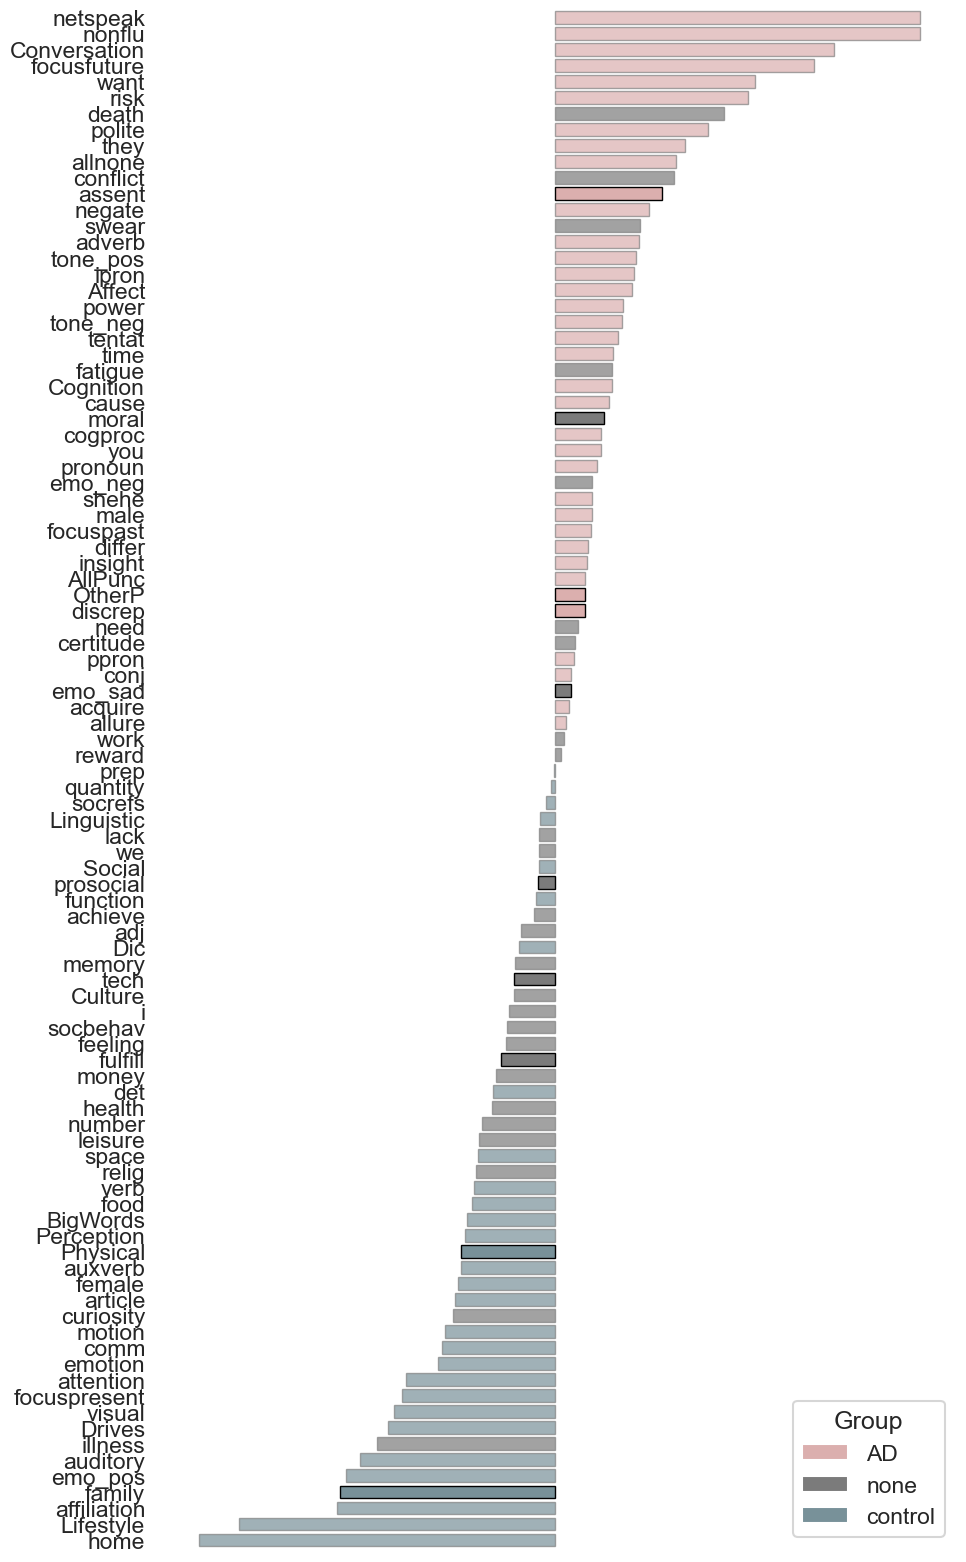

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'data' seja o DataFrame contendo as colunas 'feature', 'attribution', 'AUC_impact', e 'group'
sns.set_theme(context='talk', style='white')  # Fundo branco

# Removendo features sem valor de attribution (zero ou NaN)
filtered_data = data[(data['attribution'] != 0) & (~data['attribution'].isna())]

plt.figure(figsize=(10, 16))  # Ajuste de tamanho semelhante à imagem

# Ordenando os dados e mantendo a ordem das features no eixo y
sorted_data = filtered_data.sort_values(by='attribution', ascending=False)
sorted_data['feature'] = pd.Categorical(sorted_data['feature'], categories=sorted_data['feature'], ordered=True)

# Modificando as cores e alpha para destacar AUC_impact positivo
def get_color(row):
    base_color = {'AD': '#e2a8a7', 'none': '#7b7b7b', 'control': '#73949e'}
    alpha = 1.0 if row['AUC_impact'] == 'positive' else 0.7
    return base_color[row['group']], alpha

# Separando cores e transparências
colors, alphas = zip(*sorted_data.apply(get_color, axis=1))

# Criando o gráfico de barras
bars = sns.barplot(data=sorted_data, y='feature', x='attribution', hue='group', dodge=False, palette=['#e2a8a7', '#7b7b7b', '#73949e'])
for bar, alpha in zip(bars.patches, alphas):
    bar.set_alpha(alpha)
    # Define a cor do contorno: preto para alpha = 1 e cinza para alpha = 0.7
    edge_color = 'black' if alpha == 1 else 'gray'
    bar.set_edgecolor(edge_color)
    bar.set_linewidth(1)  # Ajusta a largura do contorno

# Customizando o gráfico
bars.legend(title='Group', loc='lower right')
bars.set(xlabel='', ylabel='')  # Remove rótulos dos eixos
bars.set(xticks=[])  # Remove ticks do eixo x
plt.gca().spines[:].set_visible(False)  # Remove os eixos e grades
plt.rcParams['pdf.fonttype'] = 42

plt.tight_layout()
plt.show()